In [4]:
import json
import matplotlib.pyplot as plt
import numpy as np

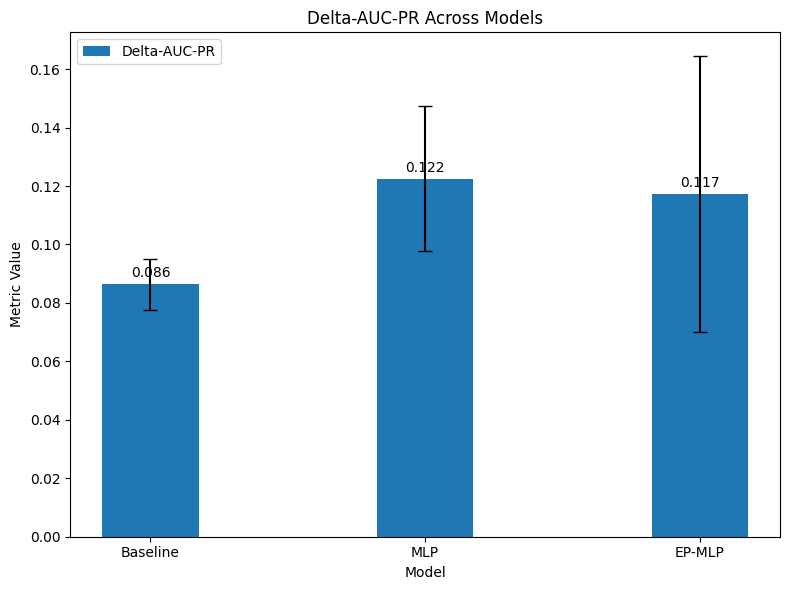

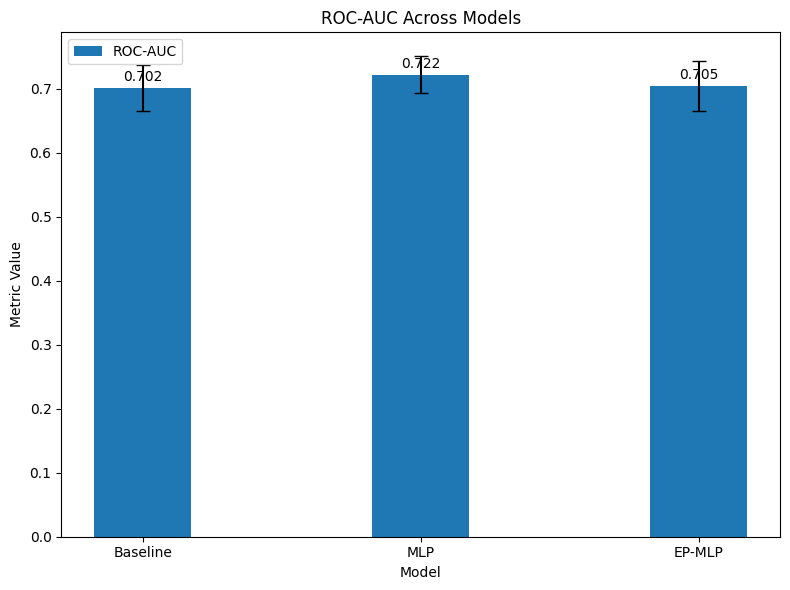

In [5]:
json_files = ['./metrics/metrics_baseline.json', './metrics/metrics_pretraining.json', './metrics/metrics_pretraining_ep.json']

# Lists to store metrics and standard deviations for each model
delta_auc_pr = []
roc_auc = []
sd_delta_auc_pr = []
sd_roc_auc = []

# Read each file and extract the metrics
for file in json_files:
    with open(file, 'r') as f:
        # Each JSON file contains a list with one dictionary
        data = json.load(f)
        metrics = data[0]
        delta_auc_pr.append(metrics["Delta-AUC-PR"])
        roc_auc.append(metrics["ROC-AUC"])
        sd_delta_auc_pr.append(metrics["Sd-Delta-AUC-PR"])
        sd_roc_auc.append(metrics["Sd-ROC-AUC"])

# Number of models
n_models = len(json_files)
x = np.arange(n_models)  # the label locations
bar_width = 0.35
models = ["Baseline", "MLP", "EP-MLP"]

# Plot for Delta-AUC-PR
plt.figure(figsize=(8, 6))
bars1 = plt.bar(x, delta_auc_pr, bar_width, yerr=sd_delta_auc_pr, capsize=5, label='Delta-AUC-PR')

# Annotate bars for Delta-AUC-PR
for bar in bars1:
    height = bar.get_height()
    plt.annotate(f'{height:.3f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.xlabel('Model')
plt.ylabel('Metric Value')
plt.title('Delta-AUC-PR Across Models')
plt.xticks(x, [f'{models[i]}' for i in range(n_models)])
plt.legend()
plt.tight_layout()
plt.show()


# Plot for ROC-AUC
plt.figure(figsize=(8, 6))
bars2 = plt.bar(x, roc_auc, bar_width, yerr=sd_roc_auc, capsize=5, label='ROC-AUC')

# Annotate bars for ROC-AUC
for bar in bars2:
    height = bar.get_height()
    plt.annotate(f'{height:.3f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.xlabel('Model')
plt.ylabel('Metric Value')
plt.title('ROC-AUC Across Models')
plt.xticks(x, [f'{models[i]}' for i in range(n_models)])
plt.legend()
plt.tight_layout()
plt.show()

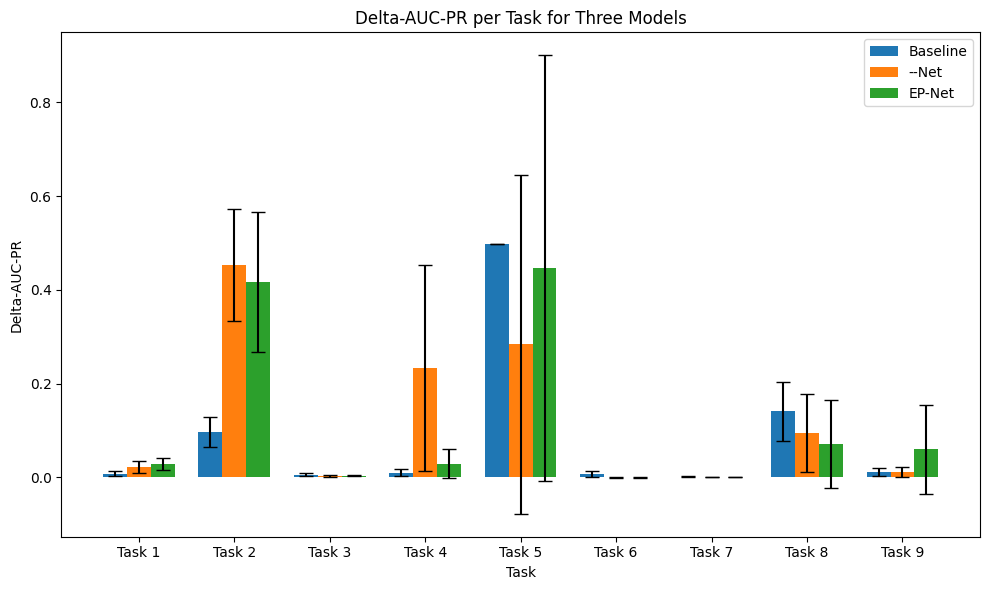

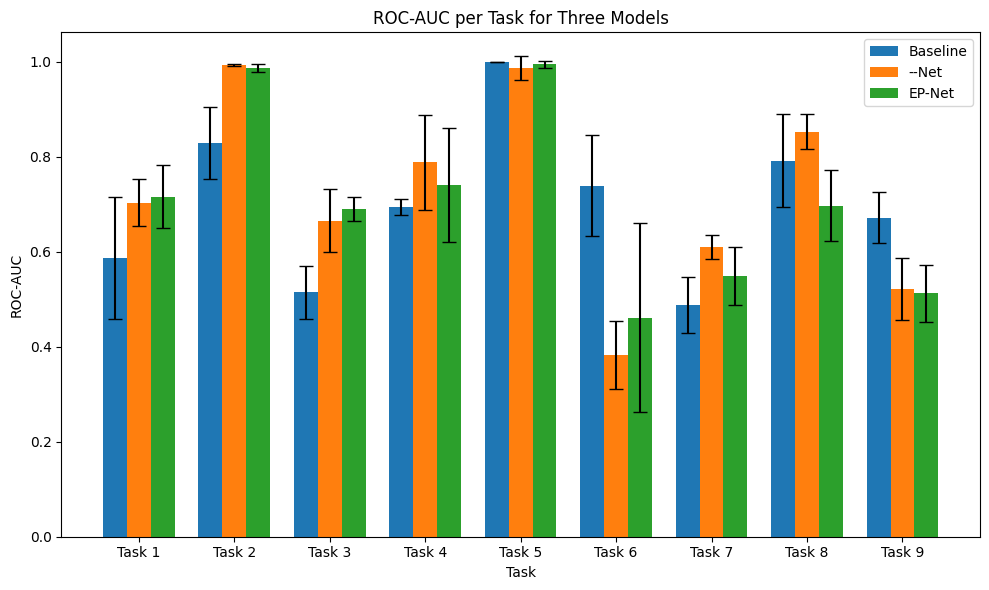

In [6]:
# List your JSON file paths for each model.
files = ['./metrics/metrics_baseline_per_task.json', './metrics/metrics_pretraining_per_task.json', './metrics/metrics_pretraining_ep_per_task.json']

# Initialize lists to store each model's metrics.
delta_auc_pr = []
delta_auc_pr_std = []
roc_auc = []
roc_auc_std = []
models = ["Baseline", "--Net", "EP-Net"]

# Load each file and extract the metrics.
for file in files:
    with open(file, 'r') as f:
        data = json.load(f)
    # Assuming that each file contains a list with a single dictionary.
    metrics = data[0]
    delta_auc_pr.append(metrics["Delta-AUC-PR per task"])
    delta_auc_pr_std.append(metrics["Sd-Delta-AUC-PR per task"])
    roc_auc.append(metrics["ROC-AUC per task"])
    roc_auc_std.append(metrics["Sd-ROC-AUC per task"])

# Determine the number of tasks (assumes all models have the same number of tasks).
num_tasks = len(delta_auc_pr[0])
tasks = np.arange(num_tasks)

# Define bar width for grouped bar charts.
bar_width = 0.25

# -------------------------------
# Plot for Delta-AUC-PR per task
# -------------------------------
plt.figure(figsize=(10, 6))
for i in range(len(files)):
    plt.bar(tasks + i * bar_width,
            delta_auc_pr[i],
            bar_width,
            yerr=delta_auc_pr_std[i],
            capsize=5,
            label=f'{models[i]}')
plt.xlabel('Task')
plt.ylabel('Delta-AUC-PR')
plt.title('Delta-AUC-PR per Task for Three Models')
plt.xticks(tasks + bar_width, [f'Task {i+1}' for i in range(num_tasks)])
plt.legend()
plt.tight_layout()
plt.show()

# ---------------------------
# Plot for ROC-AUC per task
# ---------------------------
plt.figure(figsize=(10, 6))
for i in range(len(files)):
    plt.bar(tasks + i * bar_width,
            roc_auc[i],
            bar_width,
            yerr=roc_auc_std[i],
            capsize=5,
            label=f'{models[i]}')
plt.xlabel('Task')
plt.ylabel('ROC-AUC')
plt.title('ROC-AUC per Task for Three Models')
plt.xticks(tasks + bar_width, [f'Task {i+1}' for i in range(num_tasks)])
plt.legend()
plt.tight_layout()
plt.show()
